### Download H&M Dataset from kaggle

In [8]:
# # Download the data
# !kaggle competitions download -c h-and-m-personalized-fashion-recommendations -p ../../../Data.nosync/HM_Dataset
# # Unzip the dataset
# !unzip ../../../Data.nosync/HM_Dataset/h-and-m-personalized-fashion-recommendations.zip -d ../../../Data.nosync/HM_Dataset/Raw_Data

In [51]:
from glob import glob
import json 
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## Data Exploration

In [1]:
base_path = '../../../Data.nosync/HM_Dataset/Raw_Data/'

In [7]:
# Get Images paths
image_paths = glob(base_path + 'images/*/*.jpg')
len(image_paths)

105100

In [26]:
# Load article data
df = pd.read_csv(base_path + 'articles.csv')

# filter out articles without images
has_image = [int(elem.split('/')[-1].split('.')[0]) for elem in image_paths]
print(f"Shape of articel data before filtering: {df.shape}")
df = df[df.article_id.isin(has_image)]
print(f"Shape of articel data after filtering: {df.shape}")

df.head(2)

Shape of articel data before filtering: (105542, 25)
Shape of articel data after filtering: (105100, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


### Check multiple categories and groups

In [33]:
df.product_type_name.value_counts().sort_values(ascending=False).head(10)

Trousers    11150
Dress       10348
Sweater      9295
T-shirt      7880
Top          4152
Blouse       3975
Jacket       3940
Shorts       3926
Shirt        3403
Vest top     2979
Name: product_type_name, dtype: int64

In [38]:
df.garment_group_name.value_counts().sort_values(ascending=False).head(10)

Jersey Fancy         21415
Accessories          11365
Jersey Basic          8087
Knitwear              7480
Under-, Nightwear     7412
Trousers              6718
Blouses               5830
Shoes                 5021
Dresses Ladies        4872
Outdoor               4501
Name: garment_group_name, dtype: int64

### Check Samples of dresses

In [41]:
dresses = df[df.product_type_name == 'Dress']
dresses.shape

(10348, 25)

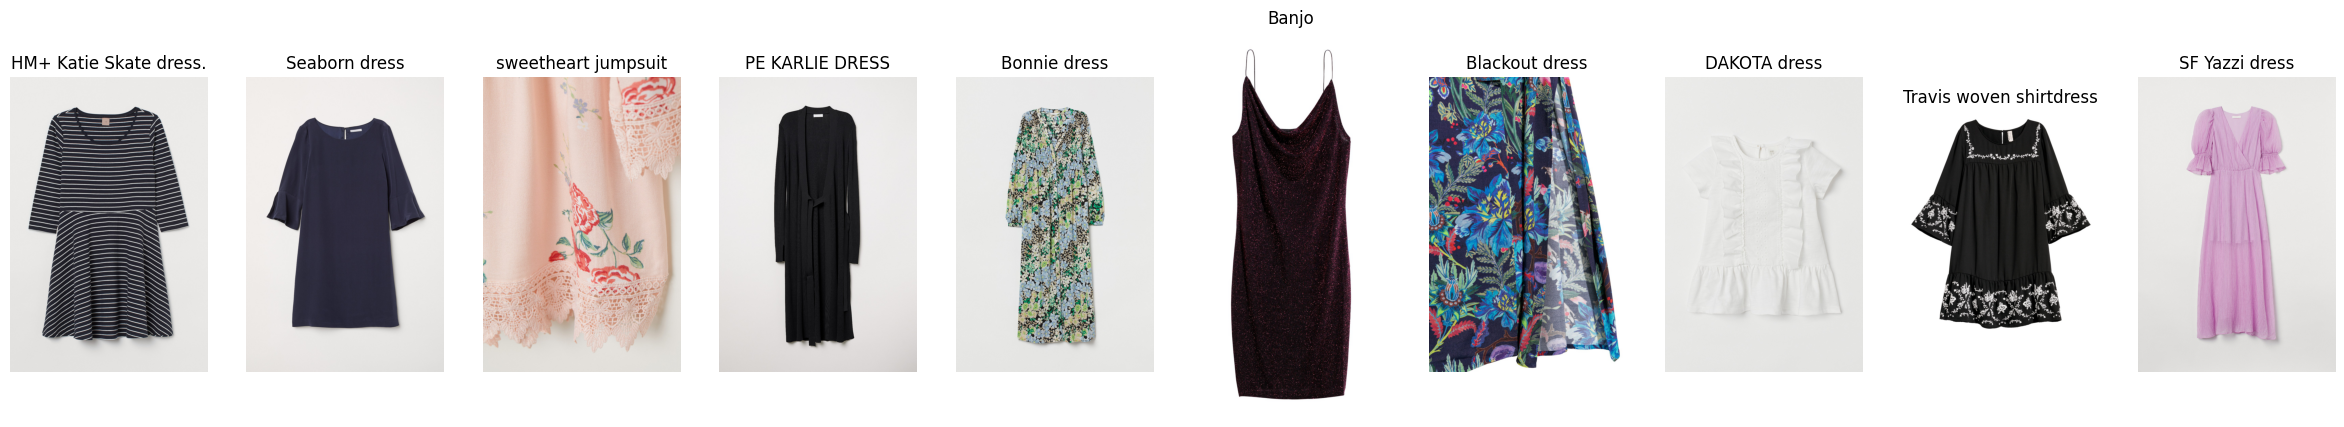

In [60]:
NUM_SAMPLES = 10
fig, ax = plt.subplots(1, NUM_SAMPLES, figsize = (30,5))
for i in range(NUM_SAMPLES):
    sample = dresses.sample(1)
    path = [elem for elem in image_paths if str(sample.article_id.item())+'.jpg' in elem]
    img = Image.open(path[0])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(sample.prod_name.item())

In [65]:
dresses.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

## Explore Additional Information

#### Product Group Name

In [72]:
dresses.product_group_name.unique()

array(['Garment Full body'], dtype=object)

In [74]:
def plot_samples(cat, df, max_plot=None):
    cat_values = df[cat].unique().tolist()
    if max_plot != None:
        cat_values = df[cat].value_counts().sort_values(ascending=False).head(max_plot).index.tolist()
    fig, ax = plt.subplots(1, len(cat_values), figsize = (30,5))
    for i, category in enumerate(cat_values):
        sub_df = df[df[cat] == category]
        if sub_df.shape[0] != 0:
            sample = sub_df.sample(1)
            path = [elem for elem in image_paths if str(sample.article_id.item())+'.jpg' in elem]
            img = Image.open(path[0])
            ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(category)

#### Graphical Appearance Name

In [73]:
dresses.graphical_appearance_name.value_counts()

Solid                  4085
All over pattern       3407
Stripe                  507
Lace                    360
Embroidery              211
Denim                   201
Check                   187
Melange                 172
Glittering/Metallic     158
Sequin                  151
Dot                     140
Application/3D          125
Front print             117
Placement print         116
Jacquard                106
Other structure          96
Chambray                 44
Colour blocking          36
Mixed solid/pattern      30
Treatment                26
Metallic                 19
Mesh                     13
Contrast                 12
Other pattern            11
Slub                      9
Unknown                   6
Transparent               2
Argyle                    1
Name: graphical_appearance_name, dtype: int64

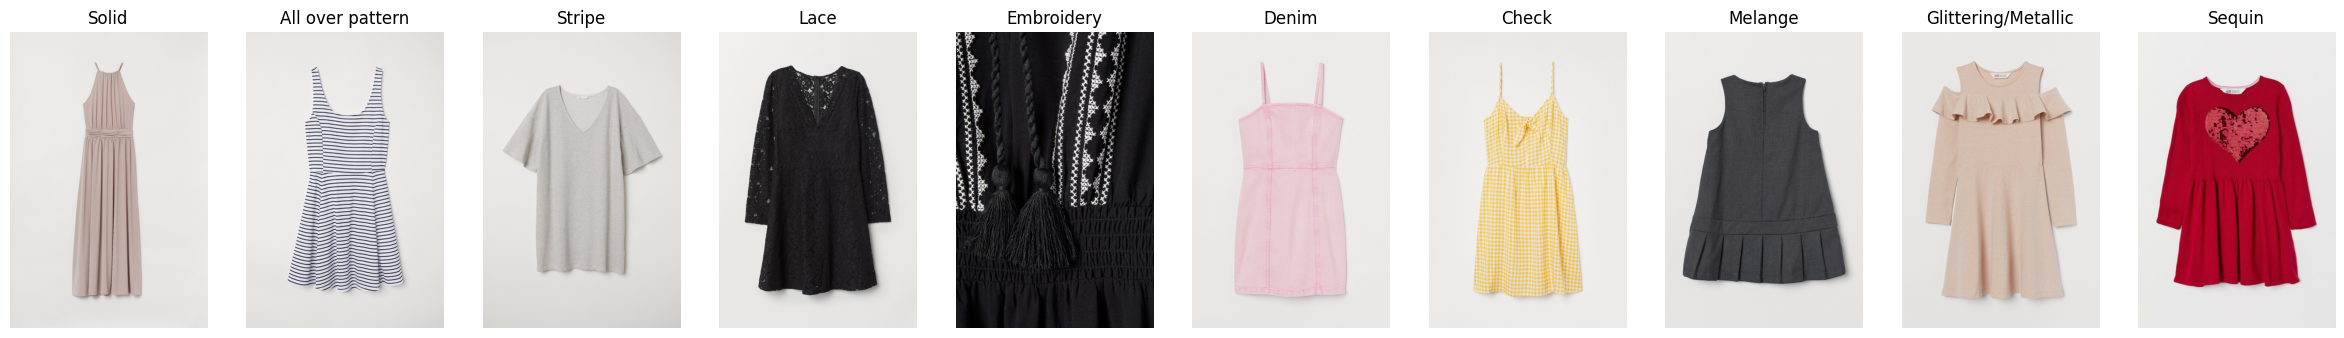

In [76]:
plot_samples('graphical_appearance_name', dresses, max_plot=10)

#### Perceived Colour Master Name

In [81]:
dresses.perceived_colour_master_name.value_counts()

Black           2678
Blue            1627
White           1236
Pink            1046
Red              793
Beige            549
Green            419
Grey             412
Yellow           381
Khaki green      294
Orange           258
Turquoise        229
Brown            124
Lilac Purple     108
Unknown           89
Mole              71
Metal             21
undefined         13
Name: perceived_colour_master_name, dtype: int64

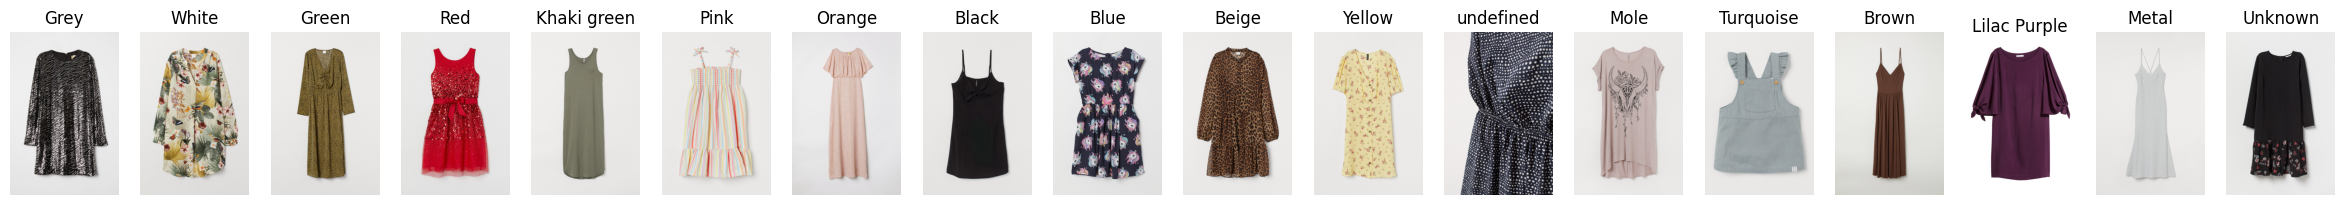

In [78]:
plot_samples('perceived_colour_master_name', dresses)

#### Garment Group Name

In [79]:
dresses.garment_group_name.value_counts()

Dresses Ladies                   4244
Jersey Fancy                     2218
Blouses                           897
Jersey Basic                      817
Dresses/Skirts girls              711
Unknown                           472
Knitwear                          280
Special Offers                    277
Woven/Jersey/Knitted mix Baby     243
Accessories                       102
Trousers Denim                     62
Under-, Nightwear                  21
Swimwear                            2
Dressed                             2
Name: garment_group_name, dtype: int64

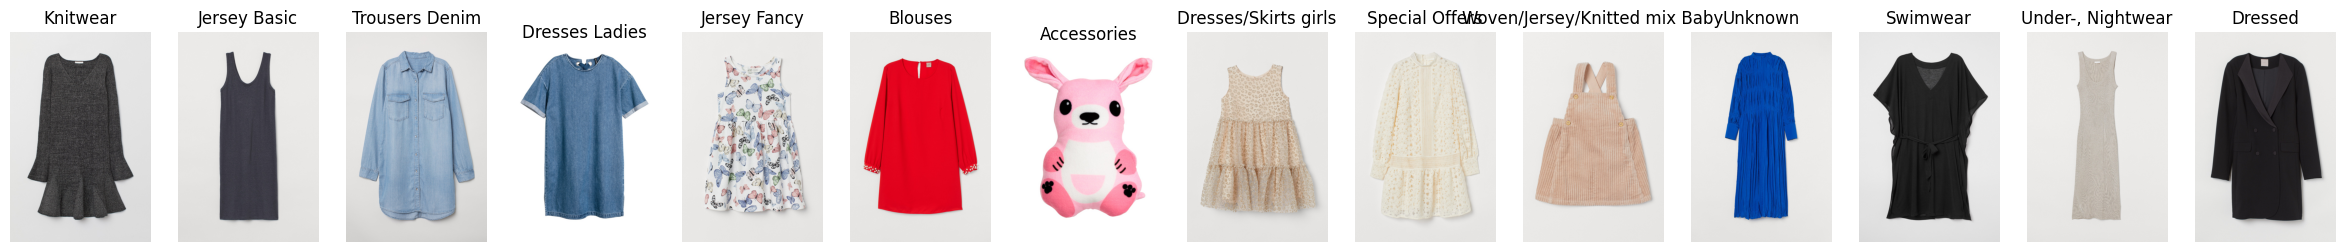

In [80]:
plot_samples('garment_group_name', dresses)